 # 巡回セールスマン問題

[ORlibraryの問題](http://people.brunel.ac.uk/~mastjjb/jeb/orlib/periodtspinfo.html)

 #### 一般的な巡回セールス問題とは

都市の集合と各2都市間の移動コスト（たとえば距離）が与えられたとき、全ての都市をちょうど一度ずつ巡り出発地に戻る巡回路のうちで総移動コストが最小のものを求める組合せ最適化問題

[巡回セールスマン問題定式化](http://www.msi.co.jp/nuopt/glossary/term_7f64c2f2bb1c2d3b292564b789b90e0d7193c8ec.html)

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

 ### 経路の計算数
 

In [3]:
import math

for n in range(1, 21):
    print('N = {}の時 (N-1)! = {}'.format(n, math.factorial(n - 1)))

N = 1の時 (N-1)! = 1
N = 2の時 (N-1)! = 1
N = 3の時 (N-1)! = 2
N = 4の時 (N-1)! = 6
N = 5の時 (N-1)! = 24
N = 6の時 (N-1)! = 120
N = 7の時 (N-1)! = 720
N = 8の時 (N-1)! = 5040
N = 9の時 (N-1)! = 40320
N = 10の時 (N-1)! = 362880
N = 11の時 (N-1)! = 3628800
N = 12の時 (N-1)! = 39916800
N = 13の時 (N-1)! = 479001600
N = 14の時 (N-1)! = 6227020800
N = 15の時 (N-1)! = 87178291200
N = 16の時 (N-1)! = 1307674368000
N = 17の時 (N-1)! = 20922789888000
N = 18の時 (N-1)! = 355687428096000
N = 19の時 (N-1)! = 6402373705728000
N = 20の時 (N-1)! = 121645100408832000


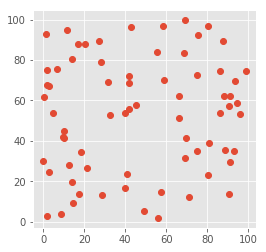

In [7]:
N = 70

np.random.seed(1)
#20*2の配列作成
city_xy = np.random.rand(N, 2) * 100
plt.figure(figsize=(4, 4))
plt.plot(city_xy[:, 0], city_xy[:, 1], 'o')
plt.show()

In [8]:
x = city_xy[:, 0]
y = city_xy[:, 1]
distance_matrix = np.sqrt((x[:, np.newaxis] - x[np.newaxis, :]) ** 2 +
                          (y[:, np.newaxis] - y[np.newaxis, :]) ** 2)

# 見やすくするために10都市分だけ出力。
# distance_matrix[i, j]が都市iと都市jの距離。
print(np.round(distance_matrix[:10, :10]))

[[ 0. 59. 68. 44. 18.  4. 26. 39. 16. 59.]
 [59.  0. 26. 19. 46. 57. 61. 37. 49. 17.]
 [68. 26.  0. 26. 51. 65. 79. 59. 54. 11.]
 [44. 19. 26.  0. 29. 41. 53. 36. 31. 15.]
 [18. 46. 51. 29.  0. 15. 39. 39.  3. 43.]
 [ 4. 57. 65. 41. 15.  0. 29. 39. 13. 56.]
 [26. 61. 79. 53. 39. 29.  0. 27. 38. 68.]
 [39. 37. 59. 36. 39. 39. 27.  0. 41. 49.]
 [16. 49. 54. 31.  3. 13. 38. 41.  0. 45.]
 [59. 17. 11. 15. 43. 56. 68. 49. 45.  0.]]


In [9]:
#print(city_xy)

In [10]:
def calculate_total_distance(order, distance_matrix):
    """Calculate total distance traveled for given visit order"""
    idx_from = np.array(order)
    idx_to = np.array(order[1:] + [order[0]])
    distance_arr = distance_matrix[idx_from, idx_to]

    return np.sum(distance_arr)

In [11]:
# 試しに適当に距離を計算
test_order = list(np.random.permutation(N))
print('訪問順序 = {}'.format(test_order))

total = calculate_total_distance(test_order, distance_matrix)
print('総移動距離 = {}'.format(total))

訪問順序 = [61, 51, 25, 60, 11, 18, 9, 63, 29, 46, 39, 47, 1, 16, 12, 52, 4, 33, 37, 2, 21, 10, 57, 23, 17, 66, 67, 58, 53, 6, 48, 5, 40, 54, 3, 45, 64, 38, 36, 34, 35, 7, 22, 43, 26, 68, 14, 27, 30, 59, 56, 62, 42, 49, 24, 19, 44, 0, 41, 15, 50, 13, 20, 65, 32, 8, 69, 31, 55, 28]
総移動距離 = 3985.223090984054


In [12]:
def visualize_visit_order(order, city_xy):
    route = np.array(order + [order[0]])
    x_arr = city_xy[:, 0][route]
    y_arr = city_xy[:, 1][route]

    plt.figure(figsize=(4, 4))
    plt.plot(x_arr, y_arr, 'o-')
    plt.show()

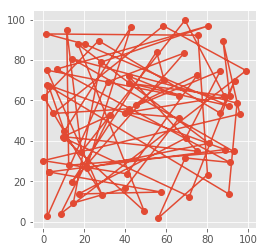

In [13]:
#可視化を試してみる
visualize_visit_order(test_order, city_xy)

In [14]:
def calculate_2opt_exchange_cost(visit_order, i, j, distance_matrix):
    """Calculate the difference of cost by applying given 2-opt exchange"""
    n_cities = len(visit_order)
    a, b = visit_order[i], visit_order[(i + 1) % n_cities]
    c, d = visit_order[j], visit_order[(j + 1) % n_cities]

    cost_before = distance_matrix[a, b] + distance_matrix[c, d]
    cost_after = distance_matrix[a, c] + distance_matrix[b, d]
    return cost_after - cost_before

In [15]:
def apply_2opt_exchange(visit_order, i, j):
    """Apply 2-opt exhanging on visit order"""

    tmp = visit_order[i + 1: j + 1]
    tmp.reverse()
    visit_order[i + 1: j + 1] = tmp

    return visit_order

 ### 近傍探索実装

In [16]:
def improve_with_2opt(visit_order, distance_matrix):
    """Check all 2-opt neighbors and improve the visit order"""
    n_cities = len(visit_order)
    cost_diff_best = 0.0
    i_best, j_best = None, None

    for i in range(0, n_cities - 2):
        for j in range(i + 2, n_cities):
            if i == 0 and j == n_cities - 1:
                continue

            cost_diff = calculate_2opt_exchange_cost(
                visit_order, i, j, distance_matrix)

            if cost_diff < cost_diff_best:
                cost_diff_best = cost_diff
                i_best, j_best = i, j

    if cost_diff_best < 0.0:
        visit_order_new = apply_2opt_exchange(visit_order, i_best, j_best)
        return visit_order_new
    else:
        return None

In [17]:
def local_search(visit_order, distance_matrix, improve_func):
    """Main procedure of local search"""
    cost_total = calculate_total_distance(visit_order, distance_matrix)

    while True:
        improved = improve_func(visit_order, distance_matrix)
        if not improved:
            break

        visit_order = improved

    return visit_order

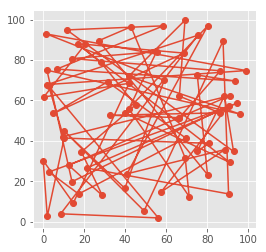

初期解の総移動距離 = 3801.2188717529616


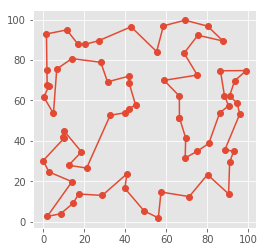

近傍探索適用後の総移動距離 = 726.8855015731718


In [18]:
# 適当に初期解を生成
test_order = list(np.random.permutation(N))
visualize_visit_order(test_order, city_xy)
total_distance = calculate_total_distance(test_order, distance_matrix)
print('初期解の総移動距離 = {}'.format(total_distance))

# 近傍を計算
improved = local_search(test_order, distance_matrix, improve_with_2opt)
visualize_visit_order(improved, city_xy)
total_distance = calculate_total_distance(improved, distance_matrix)
print('近傍探索適用後の総移動距離 = {}'.format(total_distance))


 ### 多スタート戦略

初期の解から改善を繰り返して最適な値に持っていくので、最終的な解の良さは初期解に依存する。
そこでランダムに初期解を設定し、改善するという流れを何度も繰り返し最も精度の高いものを採用する

In [19]:
def many_start(start):
    import sys

    order_best = None
    score_best = sys.float_info.max

    for _ in range(start):
        order_random = list(np.random.permutation(N))
        order_improved = local_search(
            order_random, distance_matrix, improve_with_2opt)
        score = calculate_total_distance(order_improved, distance_matrix)

        if score < score_best:
            score_best = score
            order_best = order_improved

    visualize_visit_order(order_best, city_xy)
    total_distance = calculate_total_distance(order_best, distance_matrix)
    print('総移動距離 = {}'.format(total_distance))

In [20]:
many_start(100)

KeyboardInterrupt: 

FileNotFoundError: [Errno 2] No such file or directory: 'shop-station.json'